## Feature Extaction Test

In [1]:
import sys; sys.path.insert(0, '..')
from database.dataset import *
import time

import matplotlib.pyplot as plt
from feature_extraction.feature_extraction import CandidatesFeatureExtraction
from mc_candidate_proposal.hough_mc import HoughCalcificationDetection
# from skimage.feature import haar_like_feature_coord
# from skimage.feature import draw_haar_like_feature


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
# def get_an_example_array(idx, h1_circles=None):
#     # extracting data
#     db_sample = db[idx]
#     image = db_sample['img']
#     image_id = db.df.iloc[idx].img_id

#     # candidate selection
#     if h1_circles is None:
#         h1_circles = hd.detect(image, image_id, load_processed_images=True, hough2=False)[0]
#     image = utils.min_max_norm(image, max_val=1.)
#     images = np.empty((len(h1_circles), 14, 14))
#     # generate a patches array to distribute computation
#     for j, location in enumerate(h1_circles):
#         # Get the patch arround center
#         x1, x2, y1, y2 = utils.patch_coordinates_from_center(
#             center=(location[0], location[1]), image_shape=image.shape,
#             patch_size=14, use_padding=False)
#         images[j, :, :] = image[y1:y2, x1:x2]
#     return images

### Database initialization

In [3]:
db = INBreast_Dataset(
        return_lesions_mask=True,
        level='image',
        max_lesion_diam_mm=1.0,
        partitions=['train', 'validation'],  # This is not working as you want since last update, to do so include validation
        extract_patches=True,
        extract_patches_method='all',  # 'centered'
        patch_size=256,
        stride=256,
        min_breast_fraction_roi=0.5,
        normalize=None,
        n_jobs=-1,
)

### Detectors Parameters and initialization

In [4]:
hd = HoughCalcificationDetection()

### Detector initialization

### FE

In [5]:
# FE class initialization
import feature_extraction.haar_features.haar_modules as hm

haar_params = {
    'skimage': {
        'feature_type': None, 'feature_coord': None
    },
    'ours': {
        'horizontal_feature_types': [(hm.Feature3h3v, 3, 3)],
        'rotated_feature_types': None
    },
    'patch_size': 14
}

cfe  = CandidatesFeatureExtraction(patch_size=30, fos=False, haar_params=haar_params)

In [7]:
times = []
for idx in tqdm(range(len(db))):
    # extracting data
    db_sample = db[idx]
    image = db_sample['img']
    image_id = db.df.iloc[idx].img_id
    image_mask = db_sample['lesion_mask']

    path = (Path.cwd().parent.parent / f'data/haar_features/{image_id}.fth')
    if path.exists():
        continue
    else:
        # candidate selection
        h1_circles = hd.detect(image, image_id, load_processed_images=True, hough2=False)[0]

        # feature extraction
        start = time.time()
        X = cfe.extract_features(h1_circles, image, image_mask, fp2tp_sample=10)
        times.append(time.time()-start)

        res = pd.DataFrame(data=X, columns=cfe.feature_names)
        res['img_id'] = image_id
        path.parent.mkdir(exist_ok=True, parents=True)
        res.to_feather(path)

 75%|███████▌  | 116/154 [00:22<00:08,  4.60it/s]

116
{'skimage': {'feature_type': None, 'feature_coord': None}, 'ours': {'horizontal_feature_types': [(<class 'feature_extraction.haar_features.haar_modules.Feature3h3v'>, 3, 3)], 'rotated_feature_types': None}, 'patch_size': 14}
{'skimage': {'feature_type': None, 'feature_coord': None}, 'ours': {'horizontal_feature_types': [(<class 'feature_extraction.haar_features.haar_modules.Feature3h3v'>, 3, 3)], 'rotated_feature_types': None}, 'patch_size': 14}
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


100%|██████████| 154/154 [00:45<00:00,  3.35it/s]


In [8]:
np.concatenate([np.empty(0), np.empty(10)])

array([9.99999975e-05, 9.99999975e-05, 9.99999975e-05, 5.70097733e+00,
       9.99999975e-05, 9.99999975e-05, 9.99999975e-05, 9.99999975e-05,
       9.99999975e-05, 9.99999975e-05])

In [9]:
rot_shit = res.loc[:, [i for i in res.columns if i.startswith('rot_')]].values
np.where(rot_shit > 1000)
# rot_shit
# res.loc[:, [i for i in res.columns if i.startswith('rot_')][1823]]
# res.loc[:, [i for i in res.columns if i.startswith('rot_')][1821]]

(array([], dtype=int64), array([], dtype=int64))

In [10]:
times = []
fdf = []
for idx in tqdm(range(len(db))):
    # extracting data
    db_sample = db[idx]
    image = db_sample['img']
    image_id = db.df.iloc[idx].img_id
    if image_id != 24055779:
        continue
    print(idx)
    image_mask = db_sample['lesion_mask']

    # path = (Path.cwd().parent.parent / f'data/haar_features/{image_id}.fth')
    # if path.exists():
    #     fdf.append(pd.read_feather(path))
    # else:
    # candidate selection
    h1_circles_b = hd.detect(image, image_id, load_processed_images=True, hough2=False)[0]

    # feature extraction
    X_b = cfe.extract_features(h1_circles_b, image, image_mask, fp2tp_sample=10)

    res_b = pd.DataFrame(data=X_b, columns=cfe.feature_names)
    res_b['img_id'] = image_id
    # path.parent.mkdir(exist_ok=True, parents=True)
    # res.to_feather(path)

        # classification
        # fdf.append(res)
    # break

 75%|███████▌  | 116/154 [00:23<00:09,  4.18it/s]

116
{'skimage': {'feature_type': None, 'feature_coord': None}, 'ours': {'horizontal_feature_types': [(<class 'feature_extraction.haar_features.haar_modules.Feature3h3v'>, 3, 3)], 'rotated_feature_types': None}, 'patch_size': 14}
{'skimage': {'feature_type': None, 'feature_coord': None}, 'ours': {'horizontal_feature_types': [(<class 'feature_extraction.haar_features.haar_modules.Feature3h3v'>, 3, 3)], 'rotated_feature_types': None}, 'patch_size': 14}
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


100%|██████████| 154/154 [00:46<00:00,  3.31it/s]


In [11]:
rot_shit_b = res_b.loc[:, [i for i in res_b.columns if i.startswith('rot_')]].values
np.where(rot_shit_b > 1000)

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
rot_shit_b[0,1543]

1.9e-321

In [ ]:
np.array_equal(h1_circles, h1_circles_b)

True

In [13]:
images = get_an_example_array(116, h1_circles)
for img in images:
    diagintegral_image = utils.diagonal_integral_img(img)
    # diagintegral_image
    for feature in cfe.our_haar_feature_types_r:
        value = np.dot(
            diagintegral_image[feature.coords_y, feature.coords_x],
            feature.coeffs
        )
        if value > 1000:
            print(feature)
            print(value)

In [16]:
images = get_an_example_array(116)
diagintegral_image = utils.diagonal_integral_img(images[0])
# diagintegral_image
for feature in cfe.our_haar_feature_types_r:
    value = np.dot(
        diagintegral_image[feature.coords_y, feature.coords_x],
        feature.coeffs
    )
    if value > 1000:
        print(feature)
        print(value)

-0.040015243902439934

In [17]:
value

-0.040015243902439934

In [8]:
# features_r_a = feature_instantiator(14, 'rot')
# features_r_b = feature_instantiator(14, 'rot')

In [9]:
# for i, j  in zip(features_r_a, features_r_b):
#     if i.type == j.type:
#         if np.array_equal(i.coords_x, j.coords_x):
#             if np.array_equal(i.coords_y, j.coords_y):
#                 if np.array_equal(i.coords_y, j.coords_y):
#                     if np.array_equal(i.coeffs, j.coeffs):
#                         continue
#     print(i, j)

In [12]:
cfe.our_haar_feature_types

[Feature3h3v(x=0, y=0, width=3, height=3),
 Feature3h3v(x=0, y=1, width=3, height=3),
 Feature3h3v(x=0, y=2, width=3, height=3),
 Feature3h3v(x=0, y=3, width=3, height=3),
 Feature3h3v(x=0, y=4, width=3, height=3),
 Feature3h3v(x=0, y=5, width=3, height=3),
 Feature3h3v(x=0, y=6, width=3, height=3),
 Feature3h3v(x=0, y=7, width=3, height=3),
 Feature3h3v(x=0, y=8, width=3, height=3),
 Feature3h3v(x=0, y=9, width=3, height=3),
 Feature3h3v(x=0, y=10, width=3, height=3),
 Feature3h3v(x=0, y=11, width=3, height=3),
 Feature3h3v(x=1, y=0, width=3, height=3),
 Feature3h3v(x=1, y=1, width=3, height=3),
 Feature3h3v(x=1, y=2, width=3, height=3),
 Feature3h3v(x=1, y=3, width=3, height=3),
 Feature3h3v(x=1, y=4, width=3, height=3),
 Feature3h3v(x=1, y=5, width=3, height=3),
 Feature3h3v(x=1, y=6, width=3, height=3),
 Feature3h3v(x=1, y=7, width=3, height=3),
 Feature3h3v(x=1, y=8, width=3, height=3),
 Feature3h3v(x=1, y=9, width=3, height=3),
 Feature3h3v(x=1, y=10, width=3, height=3),
 Feature

In [7]:
res.loc[:, 'o_haar_2925']

0      0.149009
1      0.149009
2      0.149009
3      0.149009
4      0.149009
         ...   
303    0.149009
304    0.149009
305    0.149009
306    0.149009
307    0.149009
Name: o_haar_2925, Length: 308, dtype: object

In [12]:
nan_features = (res.loc[:, :].isna().any()).loc[res.loc[:, :].isna().any()].index
for i in nan_features:
    nan_idxs = res.index[res.loc[:, i].isna()]

In [5]:
times = []
fdf = []
for idx in tqdm(range(len(db))):
    # extracting data
    db_sample = db[idx]
    image = db_sample['img']
    image_id = db.df.iloc[idx].img_id
    image_mask = db_sample['lesion_mask']

    path = (Path.cwd().parent.parent / f'data/haar_features/{image_id}.fth')
    if path.exists():
        fdf.append(pd.read_feather(path))
    else:
        # candidate selection
        h1_circles = hd.detect(image, image_id, load_processed_images=True, hough2=False)[0]

        # feature extraction
        start = time.time()
        X = cfe.extract_features(h1_circles, image, image_mask, fp2tp_sample=10)
        times.append(time.time()-start)

        res = pd.DataFrame(data=X, columns=cfe.feature_names)
        res['img_id'] = image_id
        path.parent.mkdir(exist_ok=True, parents=True)
        res.to_feather(path)

        # classification
        # fdf.append(res)
    # break

100%|██████████| 154/154 [34:33<00:00, 13.47s/it]


### Classification

In [4]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [5]:
# fdf = []
# for idx in tqdm(range(len(db))):
#     # extracting data
#     db_sample = db[idx]
#     image = db_sample['img']
#     image_id = db.df.iloc[idx].img_id
#     image_mask = db_sample['lesion_mask']

#     path = (Path.cwd().parent.parent / f'data/haar_features/{image_id}.fth')
#     if path.exists():
#         fdf.append(pd.read_feather(path))

# data = pd.concat(fdf).sample(frac=1)
# del fdf
# data = data.drop(columns=['candidate_coordinates', 'patch_coordinates'])
# # data.head(10)

# data.reset_index(drop=False).to_feather(Path.cwd().parent.parent / f'data/haar_features/all_train_img.fth')

data = pd.read_feather(Path.cwd().parent.parent / f'data/haar_features/all_train_img.fth')

In [21]:
cfe.feature_names

['candidate_coordinates',
 'patch_coordinates',
 'center_patch_mask_intersection']

In [38]:
nan_features = (data.loc[:, :].isna().any()).loc[data.loc[:, :].isna().any()].index
# nan_idxs = []
for i in nan_features:
    nan_idxs = data.index[data.loc[:, i].isna()]

In [40]:
data.img_id[nan_idxs].unique()

array([24055779])

In [29]:
datadata.loc[:, 'o_haar_3098'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
15394    False
15395    False
15396    False
15397    False
15398    False
Name: o_haar_3098, Length: 15399, dtype: bool

In [3]:
data = data.loc[data.img_id.isin(data.img_id.unique()[:50])]

In [4]:
data.shape

(8613, 22157)

In [6]:
from itertools import zip_longest
def blockwise(t, size=2, fillvalue=None):
    it = iter(t)
    return zip_longest(*[it]*size, fillvalue=fillvalue)

def pairwise(t):
    it = iter(t)
    return zip(it,it)

# for "pairs" of any length
def chunkwise(t, size=2):
    it = iter(t)
    return zip(*[it]*size)

In [9]:
import pickle
aucs_test = []
aucs_train = []
best_10 = []
feat_importances = []
clfs = []
for k, test_img_id in tqdm(enumerate(blockwise(data.img_id.unique(), 2))):
    train_df = data[~data.img_id.isin(test_img_id)]
    test_df = data[data.img_id.isin(test_img_id)]

    train_X, train_y = train_df.drop(columns=['center_patch_mask_intersection','img_id']), (train_df.center_patch_mask_intersection>0).astype(int)
    test_X, test_y = test_df.drop(columns=['center_patch_mask_intersection','img_id']), (test_df.center_patch_mask_intersection>0).astype(int)
    
    # Train a random forest classifier and assess its performance
    clf = RandomForestClassifier(n_estimators=1000, max_depth=None, n_jobs=-1, random_state=0)
    clf.fit(train_X, train_y)

    path = (Path.cwd().parent.parent / f'data/haar_models/')
    # save the model to disk
    filename = f'RF_{k}.sav'
    pickle.dump(clf, open(filename, 'wb'))
    
    test_y_predicted = clf.predict_proba(test_X)[:, 1]
    train_y_predicted = clf.predict_proba(train_X)[:, 1]
    auc_full_features_test = roc_auc_score(test_y, test_y_predicted)
    auc_full_features_train = roc_auc_score(train_y, train_y_predicted)
    aucs_test.append(auc_full_features_test)
    aucs_train.append(auc_full_features_train)
    
    clfs.append(clf)
    
    feat_importances.append(clf.feature_importances_)

    # cdf_feature_importances = np.cumsum(clf.feature_importances_[idx_sorted])
    # cdf_feature_importances /= cdf_feature_importances[-1]  # divide by max value
    # sig_feature_count = np.count_nonzero(cdf_feature_importances < 0.6)
    # sig_feature_percent = round(sig_feature_count /
    #                             len(cdf_feature_importances) * 100, 1)
    # print((f'{sig_feature_count} features, or {sig_feature_percent}%, '
    #     f'account for 70% of branch points in the random forest.'))

0it [00:00, ?it/s]/home/jseia/anaconda3/envs/calc_det/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
0it [00:04, ?it/s]


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [80]:
# first_400 = []
for i in range(len(feat_importances)):
    cdf_feature_importances = np.cumsum(feat_importances[i])
    cdf_feature_importances /= cdf_feature_importances[-1]  # divide by max value
    p = 0.2
    sig_feature_count = np.count_nonzero(cdf_feature_importances < p)
    sig_feature_percent = round(sig_feature_count / len(cdf_feature_importances) * 100, 1)
    print((f'{sig_feature_count} features, or {sig_feature_percent}%, '
        f'account for {p*100}% of branch points in the random forest.'))

3398 features, or 16.0%, account for 20.0% of branch points in the random forest.
3403 features, or 16.0%, account for 20.0% of branch points in the random forest.
3391 features, or 16.0%, account for 20.0% of branch points in the random forest.
3391 features, or 16.0%, account for 20.0% of branch points in the random forest.
3357 features, or 15.8%, account for 20.0% of branch points in the random forest.
3409 features, or 16.0%, account for 20.0% of branch points in the random forest.
3415 features, or 16.1%, account for 20.0% of branch points in the random forest.
3403 features, or 16.0%, account for 20.0% of branch points in the random forest.
3397 features, or 16.0%, account for 20.0% of branch points in the random forest.
3403 features, or 16.0%, account for 20.0% of branch points in the random forest.
3391 features, or 16.0%, account for 20.0% of branch points in the random forest.
3274 features, or 15.4%, account for 20.0% of branch points in the random forest.
3390 features, o

In [49]:
first_400 = []
for i in range(len(feat_importances)):
    first_400.append((np.argsort(feat_importances[i])[::-1])[:400])

In [74]:
idx, cnts = np.unique(np.asarray(first_400), return_counts=True)
idx_sorted = idx[np.argsort(cnts)[::-1]][:100]

In [3]:
# Extract all possible features
feature_coord, feature_type = \
    haar_like_feature_coord(width=14, height=14,
                            feature_type=['type-2-x', 'type-2-y', 'type-3-x', 'type-3-y', 'type-4'])

In [5]:
feature_type
feature_coord

array([list([[(0, 0), (0, 0)], [(0, 1), (0, 1)]]),
       list([[(0, 0), (0, 1)], [(0, 2), (0, 3)]]),
       list([[(0, 0), (0, 2)], [(0, 3), (0, 5)]]), ...,
       list([[(12, 10), (12, 11)], [(12, 12), (12, 13)], [(13, 12), (13, 13)], [(13, 10), (13, 11)]]),
       list([[(12, 11), (12, 11)], [(12, 12), (12, 12)], [(13, 12), (13, 12)], [(13, 11), (13, 11)]]),
       list([[(12, 12), (12, 12)], [(12, 13), (12, 13)], [(13, 13), (13, 13)], [(13, 12), (13, 12)]])],
      dtype=object)

In [ ]:
from importlib import reload 	
my_module = reload()

In [92]:
haar_params = {
    'feature_coord': feature_coord[idx_sorted[:400]],
    'feature_type': feature_type[idx_sorted[:400]]
}

cfe  = feature_extraction.feature_extraction.CandidatesFeatureExtraction(patch_size=30, haar_params=haar_params)
fdf_2 = []
for idx in tqdm(range(30)):
    # extracting data
    db_sample = db[idx]
    image = db_sample['img']
    image_id = db.df.iloc[idx].img_id
    image_mask = db_sample['lesion_mask']

    # candidate selection
    h1_circles = hd.detect(image, image_id, load_processed_images=True, hough2=False)[0]
    
    # feature extraction
    res = pd.DataFrame(cfe.extract_features(h1_circles, image, image_mask, fp2tp_sample=2))
    res['img_id'] = image_id
    
    # classification
    fdf_2.append(res)

100%|██████████| 30/30 [02:01<00:00,  4.04s/it]


In [94]:
all_data_df_2 = pd.concat(fdf_2).sample(frac=1) # merge and shuffle
data_2 = all_data_df_2.drop(columns=['candidate_coordinates', 'patch_coordinates'])
data_2.head(10)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f2513,f2514,f2515,f2516,f2517,f2518,f2519,f2520,patch_mask_intersection,img_id
113,0.369767,0.416451,0.331975,0.234902,0.141534,0.537236,0.430900,0.324565,0.166358,0.181549,...,-19.0,-9.0,-9.0,-10.0,-12.0,-19.0,-16.0,-17.0,0,20586960
27,-0.082623,-0.329011,-0.213783,-0.143386,-0.058911,-0.374954,-0.260096,-0.183031,-0.149315,-0.084105,...,-18.0,-9.0,-9.0,-10.0,-10.0,-18.0,-20.0,-20.0,20,20586960
51,-0.108121,-0.102552,-0.174014,-0.158237,-0.081206,-0.030162,-0.136427,-0.131323,0.045476,-0.086775,...,-22.0,-9.0,-11.0,-10.0,-12.0,-20.0,-20.0,-20.0,1,20587518
20,-3.305298,-3.228974,-2.299000,-1.542423,-0.762875,-4.489811,-3.274176,-2.191552,-1.296777,-1.092627,...,-17.0,-10.0,-8.0,-8.0,-10.0,-20.0,-19.0,-20.0,81,20586960
103,-0.146906,-0.142413,-0.082268,-0.025233,0.007950,-0.225717,-0.145524,-0.059454,-0.033184,-0.004839,...,-16.0,-10.0,-7.0,-8.0,-6.0,-19.0,-15.0,-17.0,0,20587638
151,0.164525,0.067551,0.063407,-0.004144,-0.012018,0.181931,0.165354,0.049731,-0.038956,0.012433,...,-17.0,-11.0,-10.0,-10.0,-10.0,-18.0,-20.0,-20.0,0,20586934
193,0.131542,0.257063,0.125521,0.124132,0.088004,0.427976,0.264474,0.212598,0.098194,0.105141,...,-22.0,-13.0,-10.0,-12.0,-10.0,-23.0,-23.0,-22.0,0,20587544
43,0.261589,0.139441,0.100074,0.090140,0.069169,0.277778,0.209345,0.149742,0.041575,0.082046,...,-18.0,-9.0,-9.0,-8.0,-11.0,-18.0,-15.0,-16.0,0,22427840
4,-0.212754,-0.066667,-0.138261,-0.098551,-0.025797,-0.027246,-0.117391,-0.091014,-0.030725,-0.009855,...,-15.0,-5.0,-7.0,-7.0,-6.0,-13.0,-13.0,-13.0,71,20587226
268,-0.122742,-0.298286,-0.177860,-0.066234,-0.069013,-0.608615,-0.421491,-0.248263,-0.242705,-0.160259,...,-22.0,-13.0,-12.0,-10.0,-12.0,-23.0,-23.0,-21.0,0,20587544


In [95]:
all_data_df_2.shape

(2328, 2525)

In [98]:
aucs_test_2 = []
feat_importances_2 = []
clfs_2 = []
for test_img_id in tqdm(data_2.img_id.unique()):
    train_df = data_2[data_2.img_id != test_img_id]
    test_df = data_2[data_2.img_id == test_img_id]

    train_X, train_y = train_df.drop(columns=['patch_mask_intersection', 'img_id']), (train_df.patch_mask_intersection>0).astype(int)
    test_X, test_y = test_df.drop(columns=['patch_mask_intersection', 'img_id']), (test_df.patch_mask_intersection>0).astype(int)

    clf = RandomForestClassifier(n_estimators=1000, max_depth=None, n_jobs=-1, random_state=0)
    clf.fit(train_X, train_y)
    
    test_y_predicted = clf.predict_proba(test_X)[:, 1]
    train_y_predicted = clf.predict_proba(train_X)[:, 1]
    auc_full_features_test = roc_auc_score(test_y, test_y_predicted)
    aucs_test_2.append(auc_full_features_test)
    clfs_2.append(clf)
    feat_importances_2.append(clf.feature_importances_)

100%|██████████| 30/30 [06:02<00:00, 12.10s/it]


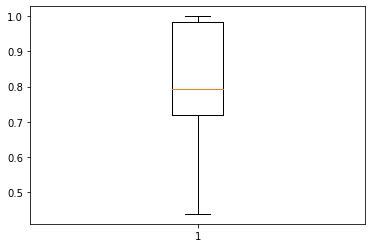

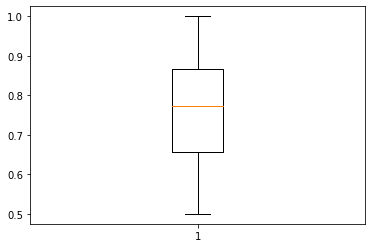

In [101]:
plt.boxplot(np.array(aucs_test))
plt.show()
plt.boxplot(np.array(aucs_test_2))
plt.show()

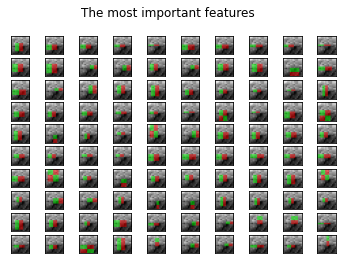

In [72]:
fig, axes = plt.subplots(10, 10)
for idx, ax in enumerate(axes.ravel()):
    image = utils.min_max_norm(images[2], 255).astype('uint8')
    image = draw_haar_like_feature(image, 0, 0,
                                   images.shape[2],
                                   images.shape[1],
                                   [feature_coord[idx_sorted[idx]]])
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])

_ = fig.suptitle('The most important features')

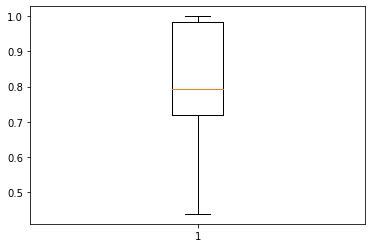

In [37]:
plt.boxplot(np.array(aucs_test))
plt.show()

## NEW Features

In [ ]:
import sys
from time import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

# Train a random forest classifier and assess its performance
clf = RandomForestClassifier(n_estimators=1000, max_depth=None, n_jobs=-1, random_state=0)
clf.fit(X_train, y_train)
auc_full_features = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Sort features in order of importance and plot the six most significant
idx_sorted = np.argsort(clf.feature_importances_)[::-1]

### GLCM

In [13]:
from general_utils.utils import min_max_norm
from skimage import feature

In [28]:
image = db[0]['img']
# not sure if agnles are what I need to get left<->right with d=2
image_patch = min_max_norm(image[300:330, 330:360], max_val=255).astype(np.uint8) # needs conversion for GLCM generation

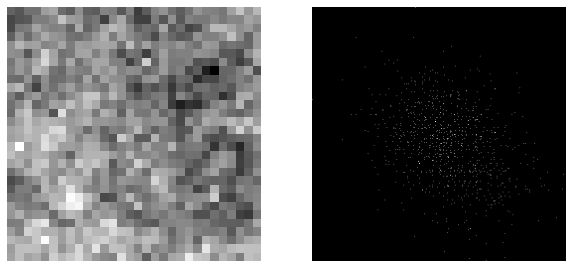

In [32]:
simple_im_show2(image_patch, feature.greycomatrix(image_patch, [2], [0, np.pi])[:,:,0,0])

In [35]:
glcm_distancs = [2]
glcm_angles = [0, np.pi]
glcm = feature.greycomatrix(image_patch, glcm_distancs, glcm_angles)
glcm.shape

(256, 256, 1, 2)

In [41]:
glcm_features = {}

skimage_glcm_features = ['energy','correlation','homogeneity','contrast','dissimilarity','ASM']
for feature_name in skimage_glcm_features:
    feature_values = feature.greycoprops(glcm, prop=feature_name)
    for fv_idx, fv in enumerate(feature_values.ravel()):
        glcm_features[f'glcm_{feature_name}_{fv_idx}'] = fv

In [50]:
glcm.shape

(256, 256, 1, 2)

In [42]:
def compute_custom_glcm_featurs(G):
    entropy, uniformity = CandidatesFeatureExtraction.entropy_uniformity(G)
    # sum average?
    # sum entropy?
    # difference entropy?
    sum_squares = (G*(1- G.mean())**2).sum()
    inverse_diff = 0
    idx_grid = np.indices((G.shape[0], G.shape[1]))
    autocorrelation = (idx_grid[0, :, :]*idx_grid[1, :, :]*G).sum()
    

{'glcm_energy_0': 0.03626558621839956,
 'glcm_energy_1': 0.03626558621839956,
 'glcm_correlation_0': 0.34565349040842414,
 'glcm_correlation_1': 0.3456534904084243,
 'glcm_homogeneity_0': 0.029272673048637537,
 'glcm_homogeneity_1': 0.029272673048637555,
 'glcm_contrast_0': 1901.1630952380947,
 'glcm_contrast_1': 1901.1630952380963,
 'glcm_dissimilarity_0': 34.70357142857142,
 'glcm_dissimilarity_1': 34.703571428571436,
 'glcm_ASM_0': 0.001315192743764172,
 'glcm_ASM_1': 0.0013151927437641717}

### Gabor Filters

In [54]:
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi


In [ ]:


def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(image, kernel, mode='wrap')
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats